In [2]:
import itertools

import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

X, Y = 0, 1
def l_inf(x1, x2):
    """Compute l-infinity distance between two 2D-points on persistence diagram"""
    return max(abs(x1[Y] - x2[Y]), abs(x1[X] - x2[X]))

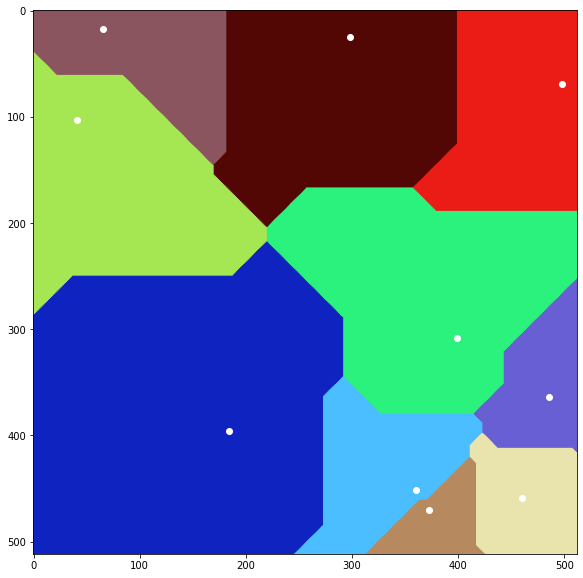

In [6]:
SIZE_X, SIZE_Y = 512, 512
# point: color
points = {
    (npr.randint(0, SIZE_X), npr.randint(0, SIZE_Y)): npr.randint(0, 255, 3)
    for _ in range(10)
}
# points[(0,0)] = npr.randint(0, 255, 3)

array = np.full(shape=[SIZE_X, SIZE_Y, 3], fill_value=255, dtype=np.uint8)

for x, y in itertools.product(range(SIZE_X), range(SIZE_Y)):
    closest = min(points, key=lambda p: l_inf(p, (x,y)))
    array[x,y,:] = points[closest]

plt.figure(figsize=(10, 10))
plt.imshow(array)
xs = [x for x, y in points]
ys = [y for x, y in points]
plt.scatter(ys, xs, color="white")

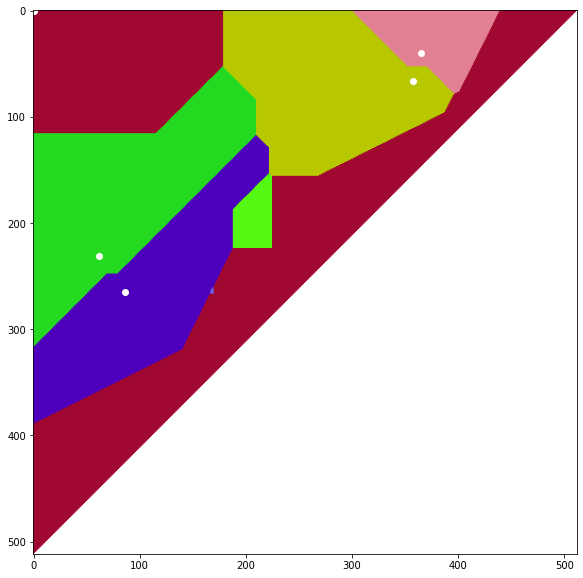

In [3]:
SIZE_X, SIZE_Y = 512, 512
# point: color
points = {
    (npr.randint(0, SIZE_X), npr.randint(0, SIZE_Y)): npr.randint(0, 255, 3)
    for _ in range(10)
}
points[(0,0)] = npr.randint(0, 255, 3)

array = np.full(shape=[SIZE_X, SIZE_Y, 3], fill_value=255, dtype=np.uint8)

for x in range(SIZE_X):
    for y in range(SIZE_Y - x):
        closest = min(points, key=lambda p: l_inf(p, (x,y)))
        # If we're closer to the diagonal
        if abs((SIZE_Y-y) - x) < l_inf(closest, (x,y)):
            array[x, y, :] = points[(0,0)]
        else:
            array[x,y,:] = points[closest]

plt.figure(figsize=(10, 10))
plt.imshow(array)
xs = [x for x, y in points]
ys = [y for x, y in points]
plt.scatter(ys, xs, color="white")